In [1]:
import pandas as pd

from pandas_datareader import data

In [2]:
fig_size = (15, 5)

In [3]:
def get_ma_analysis(ticker='^GSPC', start_date='2000-01-01', end_date='2020-11-14', ma_period=200):
    panel_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
    panel_data['MA'] = panel_data['Close'].rolling(ma_period).mean()
    panel_data['PC_MA'] = 100 * (panel_data['Close'] - panel_data['MA']) / panel_data['MA']
    panel_data['PC_MA_MEAN'] = panel_data['PC_MA'].mean()
    panel_data['PC_MA_MEDIAN'] = panel_data['PC_MA'].median()
        
    panel_data.plot(y=['Close', 'MA'], style = ['-', '--'], figsize=fig_size, grid=True)
    panel_data.plot(y=['PC_MA', 'PC_MA_MEAN', 'PC_MA_MEDIAN'],
                    style=['-', '--', '--'], figsize=fig_size, grid=True)
    panel_data.sort_values(by='PC_MA').reset_index().plot(
        y=['PC_MA', 'PC_MA_MEAN', 'PC_MA_MEDIAN'],
        style=['.', '--', '--'], figsize=fig_size, grid=True)

    return panel_data

,High,Low,Open,Close,Volume,Adj Close,MA,PC_MA,PC_MA_MEAN,PC_MA_MEDIAN
Date,,,,,,,,,,
2020-11-13,3593.659912,3552.570068,3552.570068,3585.149902,4709670000,3585.149902,3139.660897,14.18908,2.454035,3.63402


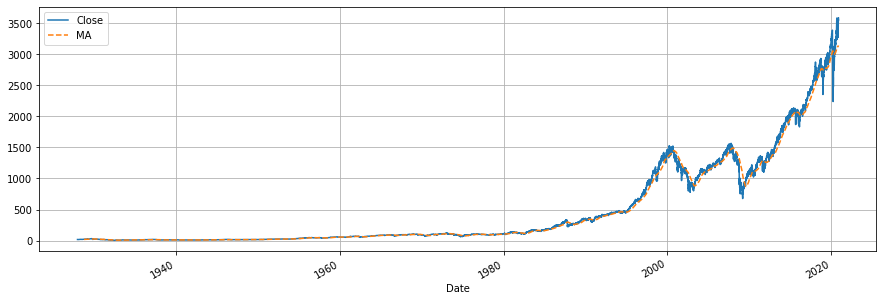

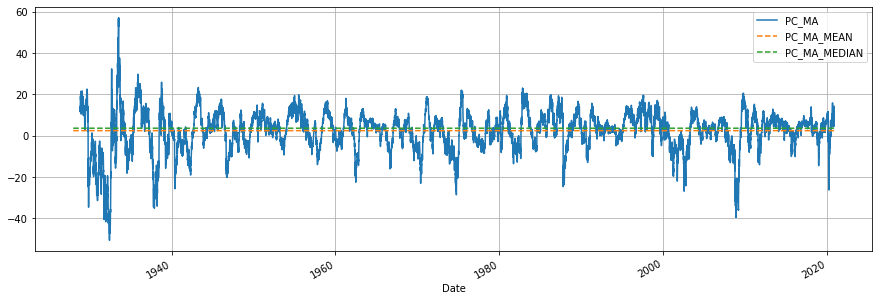

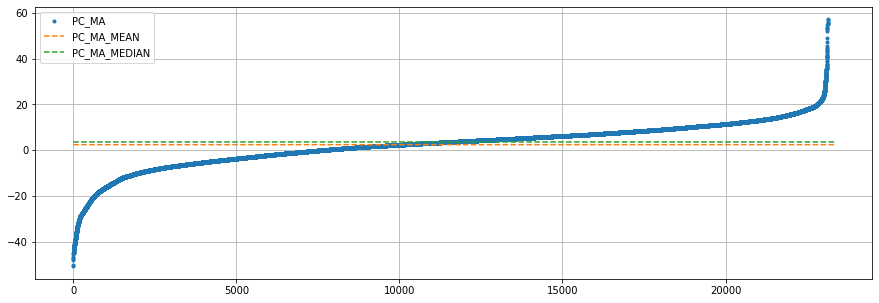

In [4]:
get_ma_analysis(start_date='1900-01-01', end_date='2020-11-14').tail(1)

,High,Low,Open,Close,Volume,Adj Close,MA,PC_MA,PC_MA_MEAN,PC_MA_MEDIAN
Date,,,,,,,,,,
2020-11-13,87.879997,87.790001,87.830002,87.82,3199500.0,87.82,87.42625,0.45038,0.459336,0.693337


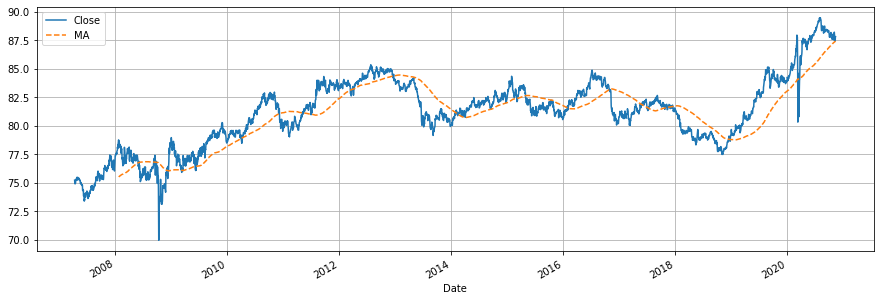

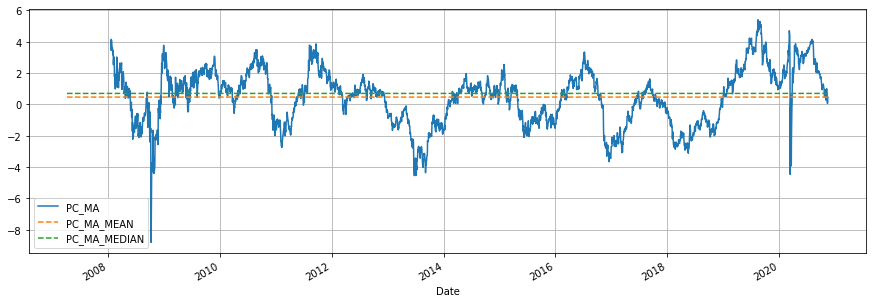

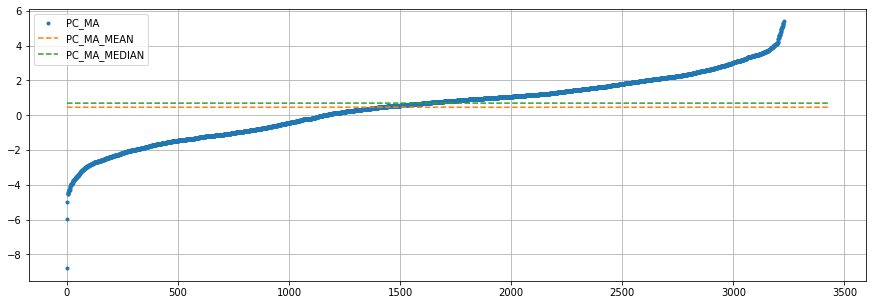

In [5]:
get_ma_analysis('BND').tail(1)

,High,Low,Open,Close,Volume,Adj Close,MA,PC_MA,PC_MA_MEAN,PC_MA_MEDIAN
Date,,,,,,,,,,
2020-11-13,82.879997,82.809998,82.839996,82.849998,1726700.0,82.849998,81.7948,1.290056,0.273373,0.269041


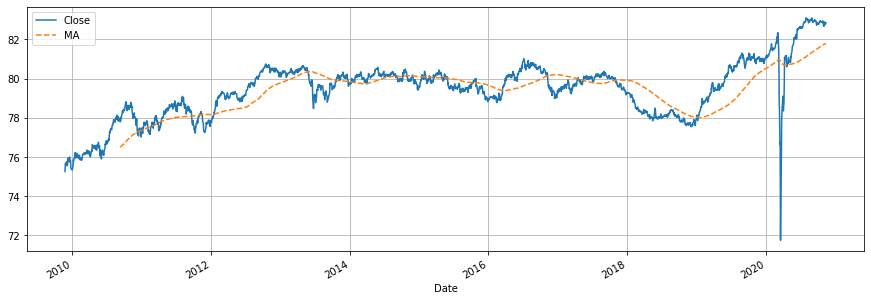

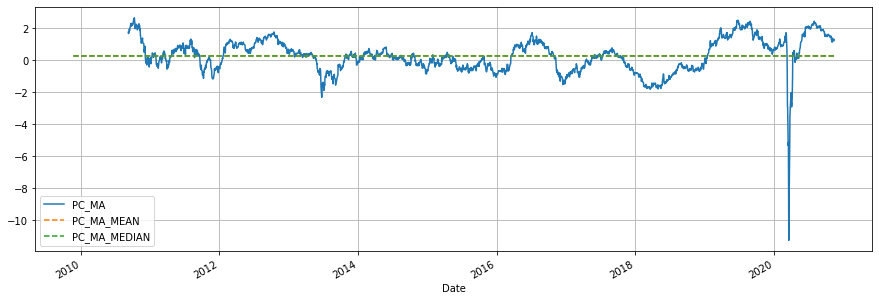

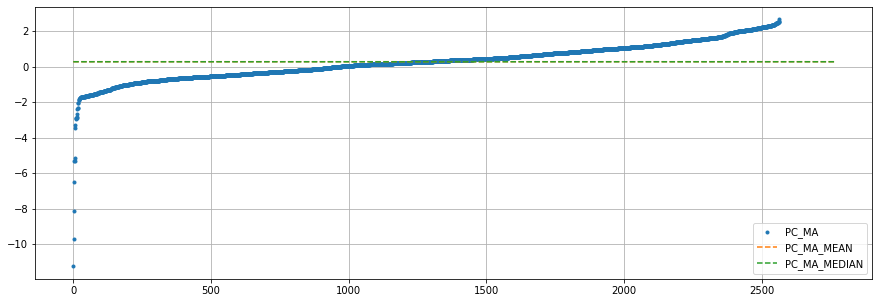

In [6]:
get_ma_analysis('VCSH').tail(1)

,High,Low,Open,Close,Volume,Adj Close,MA,PC_MA,PC_MA_MEAN,PC_MA_MEDIAN
Date,,,,,,,,,,
2020-11-13,74.887299,74.466103,74.6717,74.864998,0.0,74.864998,74.695421,0.227024,1.225275,0.63794


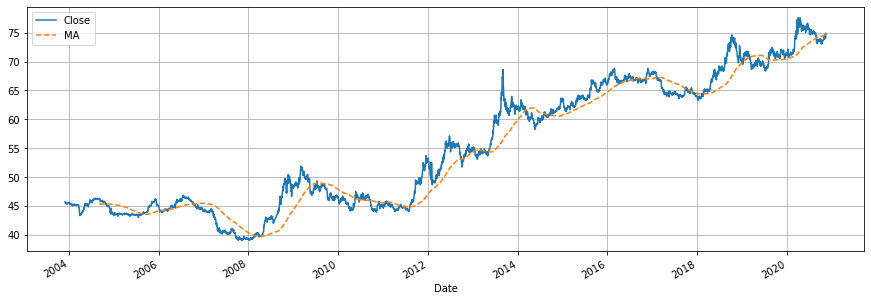

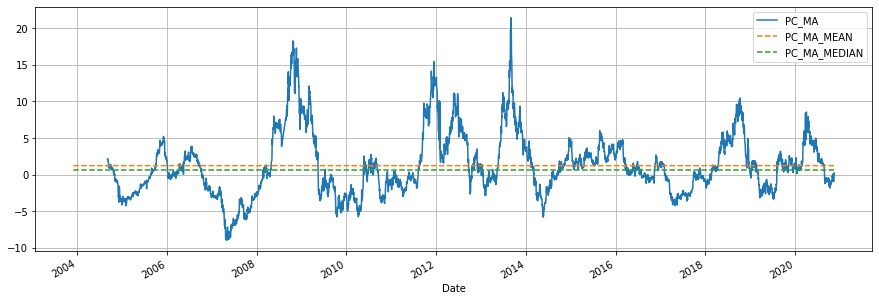

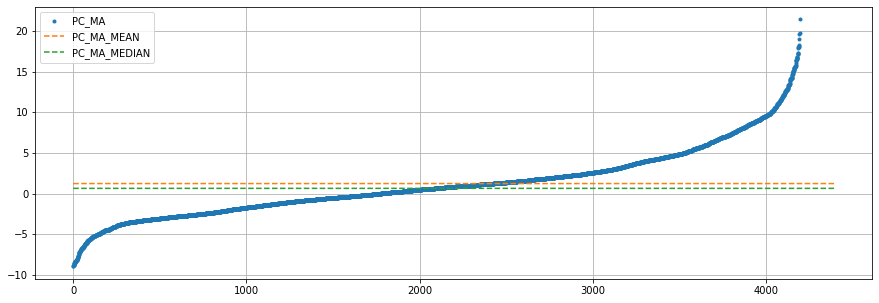

In [7]:
get_ma_analysis('INR=X').tail(1)

,High,Low,Open,Close,Volume,Adj Close,MA,PC_MA,PC_MA_MEAN,PC_MA_MEDIAN
Date,,,,,,,,,,
2020-11-13,12735.950195,12607.700195,12659.700195,12719.950195,513900.0,12719.950195,10709.367012,18.774062,2.940466,4.071944


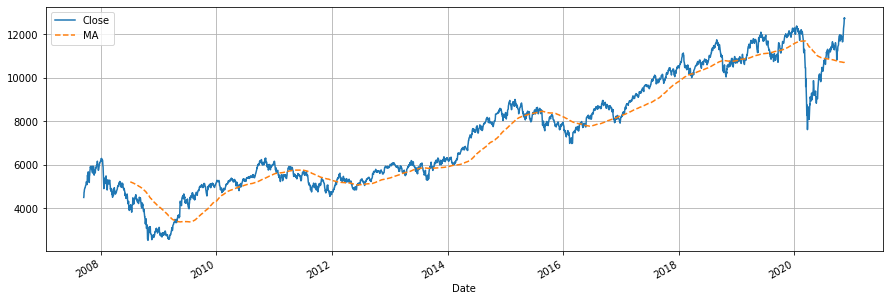

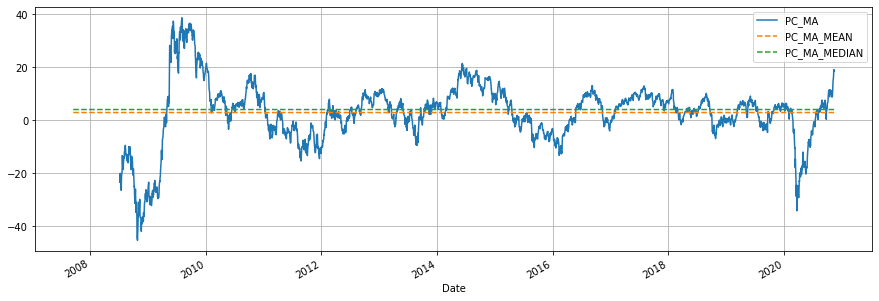

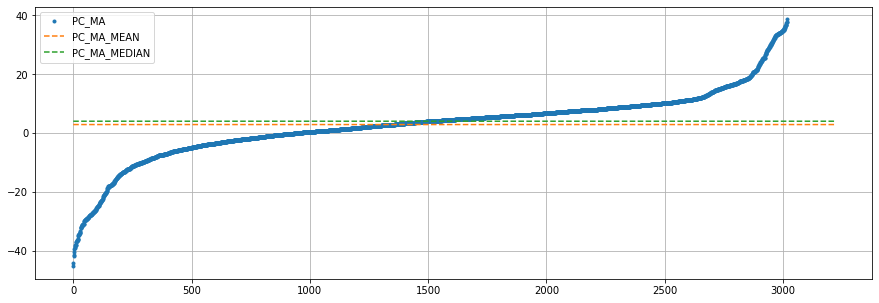

In [8]:
get_ma_analysis('^NSEI').tail(1)

,High,Low,Open,Close,Volume,Adj Close,MA,PC_MA,PC_MA_MEAN,PC_MA_MEDIAN
Date,,,,,,,,,,
2020-11-13,11849.790039,11715.519531,11794.94043,11829.290039,3640680000,11829.290039,9948.301445,18.907636,2.371242,5.095944


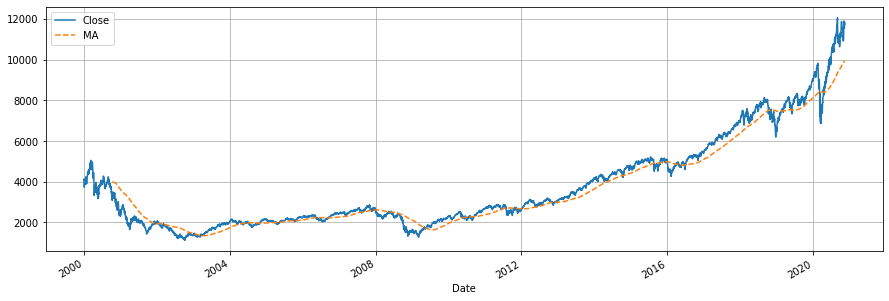

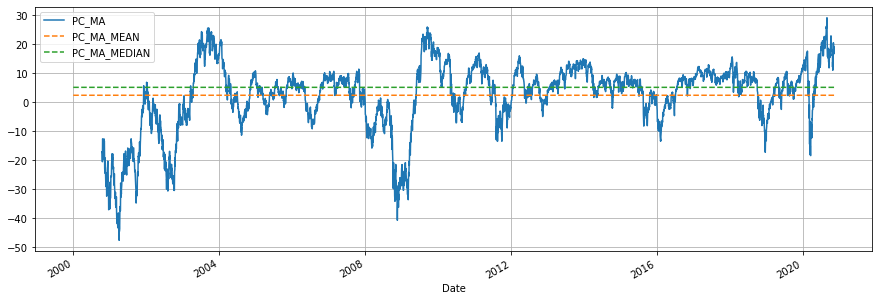

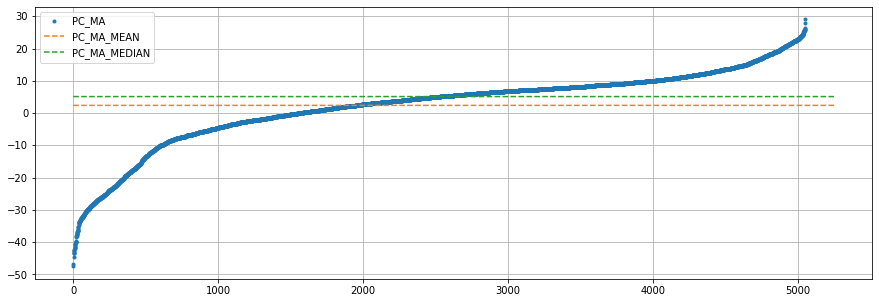

In [9]:
get_ma_analysis('^IXIC').tail(1)